In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def getplayerinfo(id):
    return players.loc[players['wyId']==id]


In [9]:
allshots=pd.read_csv('allshots.csv')

In [10]:
shots_leagues=allshots.loc[(allshots['competition']==0)|(allshots['competition']==1)|(allshots['competition']==2)|(allshots['competition']==3)|(allshots['competition']==5)]
shots_worldcup=allshots.loc[allshots['competition']==4]

In [11]:
import json
players=pd.read_json(r'C:\Users\ATHARAVA SHUKLA\Desktop\study\Football\players.json')
teams=pd.read_json(r'C:\Users\ATHARAVA SHUKLA\Desktop\study\Football\teams.json')


In [13]:
playerId=np.unique(shots_leagues['playerId'])

In [14]:
goals=[]
expectedgoals=[]
headers=[]
preferred_foot=[]
shots=[]
for id in playerId:
    temp1=shots_leagues.loc[shots_leagues['playerId']==id,'goal'].sum()
    temp2=shots_leagues.loc[shots_leagues['playerId']==id,'xG'].sum()
    temp3=(shots_leagues.loc[shots_leagues['playerId']==id]).shape[0]
    temp4=shots_leagues.loc[(shots_leagues['playerId']==id)&(shots_leagues['goal']==1),'headers'].sum()
    temp5=shots_leagues.loc[(shots_leagues['playerId']==id)&(shots_leagues['goal']==1),'preferrence'].sum()
    goals=np.append(goals,temp1)
    expectedgoals=np.append(expectedgoals,temp2)
    headers=np.append(headers,temp4)
    preferred_foot=np.append(preferred_foot,temp5)
    shots=np.append(shots,temp3)

In [15]:
matrix=[[playerId,goals,expectedgoals,headers,preferred_foot,shots]]
matrix=np.transpose(matrix)
matrix=np.reshape(matrix,(np.shape(matrix)[0],np.shape(matrix)[1]))

In [16]:
goalscoring_leagues = pd.DataFrame(matrix, columns=['playerId','goals','expectedgoals','headers','preferred_foot','shots'])

In [17]:
goalscoring_leagues['unpreferred_foot']=goalscoring_leagues['goals']-goalscoring_leagues['preferred_foot']


In [18]:
goalscoring_leagues['preferred_foot']=goalscoring_leagues['preferred_foot']-goalscoring_leagues['headers']

In [19]:
xGdifference=goalscoring_leagues.goals-goalscoring_leagues.expectedgoals

In [20]:
goalscoring_leagues['xGdifference']=xGdifference

In [21]:
birthDate=players.birthDate
birthdates=[]
for i in range(len(birthDate)):
    temp=birthDate[i][0:4]
    temp=int(temp)
    temp = 2018-temp
    birthdates=np.append(birthdates,temp)
players['age']=birthdates

In [22]:
lastname=[]
age=[]
for id in playerId:
    temp1=players.loc[players['wyId']==id].shortName
    temp2=players.loc[players['wyId']==id].age
    lastname=np.append(lastname,temp1)
    age=np.append(age,temp2)
    

In [23]:
goalscoring_leagues.loc[goalscoring_leagues['playerId']==0]

,playerId,goals,expectedgoals,headers,preferred_foot,shots,unpreferred_foot,xGdifference
0,0.0,0.0,0.1479,0.0,0.0,3.0,0.0,-0.1479


In [24]:
goalscoring_leagues=goalscoring_leagues.drop(0)

In [25]:
goalscoring_leagues['names']=lastname
goalscoring_leagues['age']=age

In [26]:
goalscoring_leagues['playerId']=goalscoring_leagues['playerId'].astype(int)
goalscoring_leagues['goals']=goalscoring_leagues['goals'].astype(int)
goalscoring_leagues['headers']=goalscoring_leagues['headers'].astype(int)
goalscoring_leagues['preferred_foot']=goalscoring_leagues['preferred_foot'].astype(int)
goalscoring_leagues['shots']=goalscoring_leagues['shots'].astype(int)
goalscoring_leagues['unpreferred_foot']=goalscoring_leagues['unpreferred_foot'].astype(int)
goalscoring_leagues['age']=goalscoring_leagues['age'].astype(int)
cols=['playerId', 'names','age','shots', 'goals', 'expectedgoals', 'xGdifference', 'headers', 'preferred_foot',
       'unpreferred_foot']
goalscoring_leagues=goalscoring_leagues[cols]

In [27]:
goalscoring_leagues = goalscoring_leagues.sort_values('goals',
                                     ascending=False)

In [49]:
goalscoring_leagues=pd.read_csv('openplaygoals_leagues.csv')

In [29]:
top20=goalscoring_leagues[:20]
top20

,playerId,names,age,shots,goals,expectedgoals,xGdifference,headers,preferred_foot,unpreferred_foot
1391,120353,Mohamed Salah,26,136,31,17.5850,13.4150,2,24,5
434,8717,H. Kane,25,162,27,22.3426,4.6574,6,11,10
99,3359,L. Messi,31,142,26,17.7719,8.2281,0,24,2
342,7972,L. Su\u00e1rez,31,103,24,19.4382,4.5618,2,18,4
823,21174,E. Cavani,31,93,24,17.2900,6.7100,4,17,3
77,3322,Cristiano Ronaldo,33,151,23,22.5038,0.4962,5,11,7
1492,206314,M. Icardi,25,87,23,14.7196,8.2804,4,16,3
543,14817,R. Lewandowski,30,106,23,19.7717,3.2283,5,12,6
840,21384,C. Immobile,28,102,22,12.5538,9.4462,5,15,2
979,25770,F. Thauvin,25,112,19,13.2896,5.7104,4,12,3


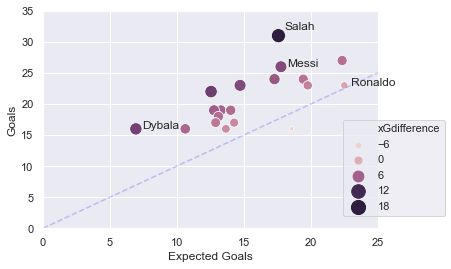

In [30]:
sns.set(style="darkgrid")
xGplot=sns.scatterplot(data=top20, y='goals', x='expectedgoals', hue='xGdifference',size='xGdifference', sizes=(20,200))
xGplot.set(xlim=(0,25))
xGplot.set(ylim=(0,35))
plt.legend(bbox_to_anchor=(1.2,0.5),
           borderaxespad=0)
plt.xlabel('Expected Goals')
plt.ylabel('Goals')
plt.annotate('Salah', (17.5850, 31), (18,32))
plt.annotate('Dybala', (7.4,16))
plt.annotate('Ronaldo', (23,23))
plt.annotate('Messi', (18.2,26))
plt.plot([0, 35], [0, 35], color='blue', linestyle='--', alpha=0.2)

In [31]:
top20_U21=goalscoring_leagues.loc[goalscoring_leagues['age']<=21][:20]

In [32]:
top20_U21

,playerId,names,age,shots,goals,expectedgoals,xGdifference,headers,preferred_foot,unpreferred_foot
1946,353833,K. Mbapp\u00e9,20,75,13,11.0826,1.9174,0,8,5
1898,340386,Gabriel Jesus,21,53,13,10.5180,2.4820,3,7,3
1951,355599,Mikel Oyarzabal,21,57,12,6.3038,5.6962,0,10,2
1849,300485,Malcom,21,57,10,5.6392,4.3608,0,8,2
1938,351010,P. Cutrone,20,42,10,8.2987,1.7013,3,4,3
2004,388267,L. Bailey,21,64,9,6.2791,2.7209,0,9,0
1778,279780,J. Augustin,21,34,8,4.9804,3.0196,0,8,0
1689,258264,L. Jovi\u0107,21,35,8,7.6160,0.3840,2,2,4
2029,397178,M. Rashford,21,54,7,4.9943,2.0057,2,5,0
1934,350032,C. \u00dcnder,21,46,7,5.5560,1.4440,0,7,0


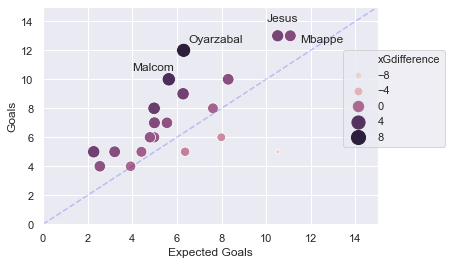

In [33]:
sns.set(style="darkgrid")
xGplot=sns.scatterplot(data=top20_U21, y='goals', x='expectedgoals', hue='xGdifference',size='xGdifference', sizes=(20,200))
xGplot.set(xlim=(0,15))
xGplot.set(ylim=(0,15))
plt.legend(bbox_to_anchor=(1.2,0.8),
           borderaxespad=0)
plt.xlabel('Expected Goals')
plt.ylabel('Goals')
plt.annotate('Mbappe', (11.5,12.5))
plt.annotate('Jesus', (10,14))
plt.annotate('Oyarzabal', (6.5,12.5))
plt.annotate('Malcom', (4,10.6))
plt.plot([0, 15], [0, 15], color='blue', linestyle='--', alpha=0.2)

In [402]:
goalscoring_leagues.to_csv('openplaygoals_leagues.csv',index=False,float_format='%.4f')